## T09

María Fernanda Muñoz Sevilla

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from ISLP import load_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### 1

Derivada:
Var[alfaX+(1-alfa)Y]=alfa^2Var[X]+(1+alfa)^2Var[Y]+2alfa(1-alfa)Cov[X,Y]
Sustituyendo:
=alfa^2sigma^2x+(1-alfa)^2sigmay+2alfa(1-alfa)sigmaxy

Derivamos respecto a alfa para la varianza minima

dVar/dalfa =d/dalfa[alfa^2sigmax^2]+d/dalfa[(1-alfa)^2sigmay^2]+d/dalfa[2alfa(1-alfa)sigmaxy]
=2alfasigmax^2-2(1-alfa)sigmay^2+2(1-2alfa)sigmaxy

Igualamos a 0 y despejamos alfa:

alfasigmax^2-(1-alfa)sigmay^2+(1-2alfa)sigmaxy=0
alfa(sigamx^2+sigmay^2-2sigmaxy)=sigmay^2-sigmaxy
alfa=(sigmay^2-sigmaxy)/sigmax^2+sigmay^2-2sigmaxy

### 2

a) si la probabilidad de elegir un elemento es p(j) =1/n, entonces:
p(no j)=1-1/n

b) Bootstrap es con reemplazo, entonces:
1-1/n

c) Si 1-1/n es la probabilidad de que no sea j, entonces seria:
para dos observaciones:
(1-1/n)^2
Para 3:
(1-1/n)^3
Así n veces:
(1-1/n)^n

Entonces la probalidad de que si este al menos una vez es el complemento:
P(si esta)=1-(1-1/n)^n



d)
n=5 
1-(1-1/5)^5=0.672

e)
n=100
1-(1-1/100)^100=0.634

f)
n=10000
1-(1-1/10000)^10000=0.632

Entre más grande el número más se acerca al límite

g)

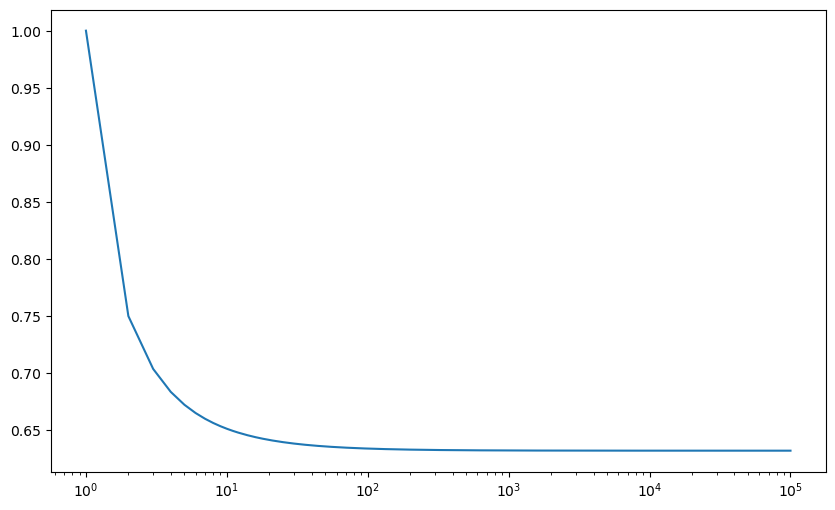

In [15]:

n_values = np.arange(1, 100001)

probabilities = 1 - (1 - 1.0/n_values)**n_values

plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities)
plt.xscale('log')
plt.show()

Vemos que hay un límite en la probabilidad de que j si este en el smapling

h)

In [19]:

rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, size=100, replace=True) == 4) > 0
np.mean(store)

0.6362

La probabilidad es igual que la teorica j=4

### 3

a)

Es un método donde se entrena el modelo con una parte de los datos y se prueba su desempeño con la parte sobrante mediante iteraciones, dando vuelta entera a todos los datos para poder usar todos en distintos tiempos.

b)

i. 
Ventajas respecta a train test: usa todos los datos sin caer en overfiting
Desventaja: es mas pesado y complejo commputacionalmente

ii. 
Ventajas contra LOOCV: más ligero y simple computacionalmente
Desventaja: no usa tantos datos como se podría usar



### 4

Cálculo de la desviación estándar de la predicción:
Tomamos Y para cierta X y le restamos lo que predijimos para que sea misma X
Elevamos al cuadrado la diferencia, sumamos todas las diferencias cuadradas, sacamos la raíz cuadrada de toda la suma y es tenemos la desviación de la predicción

### 5

a)

In [31]:
default =pd.read_csv("C:/Users/munoz/Downloads/lab_apre_est/Default.csv")
X_2 = default[['balance', 'income']]
y = default['default'].map({'Yes': 1, 'No': 0})
modelo_normal = LogisticRegression()
modelo_normal.fit(X_2, y)

LogisticRegression()

i.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)


ii.

In [39]:

modelo_train = LogisticRegression()
modelo_train.fit(X_train, y_train)

LogisticRegression()

iii.

In [42]:
y_pred = modelo_train.predict(X_test)


iv.

In [45]:
fail_1 = np.mean(y_pred != y_test)
print(f'Failure rate: {fail_1:.4f}')

Failure rate: 0.0305


c)

In [60]:
failures = [fail_1]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=i)
    modelo_train = LogisticRegression()
    modelo_train.fit(X_train, y_train)
    y_pred = modelo_train.predict(X_test)
    fail = np.mean(y_pred != y_test)
    failures.append(fail)

print("Los 3 porcentajes de fracaso son: ",failures)

Los 3 porcentajes de fracaso son:  [0.0305, 0.028, 0.027]


Todos dan errores casi iguales, entonces este modelo es bueno para generalizar

d)

In [74]:
from sklearn.linear_model import LogisticRegression

# Codificar student
default['student'] = default['student'].map({'Yes': 1, 'No': 0})

# Revisar NaN antes de hacer cualquier cosa
print("NaNs por columna:")
print(default[['balance', 'income', 'student']].isna().sum())

# Mostrar primeros valores para inspección
print("\nPrimeras filas:")
print(default[['balance', 'income', 'student']].head())

# Si TODO es NaN, avisamos
if default[['balance', 'income', 'student']].dropna().shape[0] == 0:

    # Llenamos NaN con la media
    X_3 = default[['balance', 'income', 'student']].fillna(
        default[['balance', 'income', 'student']].mean(numeric_only=True)
    )
    
    # Crear y
    y = default['default'].map({'Yes': 1, 'No': 0})
    
    # Verificar shapes
    print("\nShape final de X_3:", X_3.shape)
    print("Shape final de y:", y.shape)

# Entrenar el modelo
modelo_normal = LogisticRegression()
modelo_normal.fit(X_3, y)

print("\nModelo entrenado correctamente.")


NaNs por columna:
balance        0
income         0
student    10000
dtype: int64

Primeras filas:
       balance        income  student
0   729.526495  44361.625074      NaN
1   817.180407  12106.134700      NaN
2  1073.549164  31767.138950      NaN
3   529.250605  35704.493940      NaN
4   785.655883  38463.495880      NaN

Shape final de X_3: (10000, 3)
Shape final de y: (10000,)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values